<hr/>

# EDA of Stock Prices - Financial Crisis
**[by Tomas Mantero](https://www.kaggle.com/tomasmantero)**
<hr/>

### Table of Contents
1. [Introduction](#ch1)
1. [Get the Data](#ch2)
1. [Data](#ch3)
1. [Exploratory Data Analysis](#ch4)
1. [Standard Deviation](#ch5)
1. [Pearson Correlation Matrix](#ch6)
1. [Financial Charts - Plotly](#ch7)
1. [Returns Histogram](#ch8)
1. [Moving Averages](#ch9)
1. [Simple Moving Averages](#ch10)
1. [Candlestick Charts](#ch11)
1. [Bollinger Bands](#ch12)
1. [Bank Facet plot](#ch13)
1. [OHLC Charts](#ch14)
1. [References](#ch15)

<a id="ch1"></a>
## Introduction 
---

In this notebook we will focus on exploratory data analysis of banks stock prices. We will use pandas to directly read data from **Yahoo Finance.** The main objective is to show step-by-step how to **analyze and visualize** different features from the dataset to have a better understanding of the bank industry and how it behaves.

We will focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2020.

If you have a question or feedback, do not hesitate to write and if you like this kernel,<b><font color='green'> please upvote! </font></b>

The following questions will be answered throughout the Notebook:
* ***What is the max Close price for each bank's stock throughout the time period?***
* ***On what date did Citigroup stock reach its highest price?***
* ***Why does the first row have NaN values?***
* ***Is there a stock that stands out?***
* ***Did anything significant happen on 2009-01-20?***
* ***Which stock would you classify as the riskiest over the entire time period?***
* ***Which would you classify as the riskiest for the year 2015?***
* ***What is the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008?***

<img src="https://images.pexels.com/photos/241544/pexels-photo-241544.jpeg?auto=compress&cs=tinysrgb&dpr=3&h=750&w=1260" title="source: www.pexels.com" width="700" height="700"/>
<br>

<a id="ch2"></a>
## Get the Data
---
We will use pandas to directly read data from [Yahoo Finance](https://finance.yahoo.com/). First we need to install [pandas-datareader](https://pandas-datareader.readthedocs.io/en/latest/) for this to work. Pandas datareader allows you to read stock information directly form the internet. [GitHub pandas-datareader](https://github.com/pydata/pandas-datareader)

Just open your Command Prompt (CMD) and write `pip install pandas-datareader`.

In case you cannot access the data from yahoo finance I created a dataset with the same information. There you can find the same banks with the historical stock prices. 

You can access the dataset [here.](https://www.kaggle.com/tomasmantero/banks-historical-stock-price)

<a id="ch3"></a>
## Data
<hr/>

* Stock data from Jan 1st 2006 to Jan 1st 2020.
* Six banks. 
* 6 columns and 3523 rows.
* Source: Yahoo Finance. 

We will get stock information for the following banks:
* [Bank of America (BAC)](https://en.wikipedia.org/wiki/Bank_of_America)
* [CitiGroup (C)](https://en.wikipedia.org/wiki/Citigroup)
* [Goldman Sachs (GS)](https://en.wikipedia.org/wiki/Goldman_Sachs)
* [JPMorgan Chase (JPM)](https://en.wikipedia.org/wiki/JPMorgan_Chase)
* [Morgan Stanley (MS)](https://en.wikipedia.org/wiki/Morgan_Stanley)
* [Wells Fargo (WFC)](https://en.wikipedia.org/wiki/Wells_Fargo)

***Feature Columns***
    
* **High:** Is the highest price at which a stock traded during the course of the trading day. 
* **Low:** Is the lowest price at which a stock traded during the course of the trading day.
* **Open:** Is the price at which a stock started trading when the opening bell rang.
* **Close:** Is the last price at which a stock trades during a regular trading session.
* **Volume:** Is the number of shares that changed hands during a given day. 
* **Adj Close:** The adjusted closing price amends a stock's closing price to reflect that stock's value after accounting for any corporate actions. Factors in corporate actions, such as stock splits, dividends, and rights offerings.

<img src="https://analyzingalpha.com/assets/images/posts/2020-04-17-bar-chart-ohlc.png" alt="Bar Chart OHLC" width="300" height="300"/>

### Imports

In [99]:
# data analysis and wrangling
import pandas as pd
from pandas_datareader import data
import numpy as np
import random as rnd
import datetime

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline

# plotly
import plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import cufflinks as cf
cf.go_offline()

We want to analyze the behavior of the stock price of these banks. We will get stock data from Jan 1st 2006 to Jan 1st 2020 for each of these banks. Then, set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:
1. Use datetime to set start and end datetime objects.
2. Figure out how to use datareader to grab info on the stock.

**Documentation: [Remote Data Access](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html)**

In [100]:
# set the start date and end date.
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2020,1,1)

# Set each bank to be a separate dataframe
BAC = data.DataReader("BAC", 'yahoo', start, end)
C = data.DataReader("C", 'yahoo', start, end)
GS = data.DataReader("GS", 'yahoo', start, end)
JPM = data.DataReader("JPM", 'yahoo', start, end)
MS = data.DataReader("MS", 'yahoo', start, end)
WFC = data.DataReader("WFC", 'yahoo', start, end)

In [101]:
# preview one dataframe
BAC.head()

High        Low       Open      Close      Volume  Adj Close
Date                                                                         
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0  34.811729
2006-01-04  47.240002  46.450001  47.000000  46.580002  17757900.0  34.442013
2006-01-05  46.830002  46.320000  46.580002  46.639999  14970700.0  34.486385
2006-01-06  46.910000  46.349998  46.799999  46.570000  12599800.0  34.434616
2006-01-09  46.970001  46.360001  46.720001  46.599998  15619400.0  34.456806

Let's create a list of the ticker symbols (as strings) in alphabetical order.

In [102]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

Use `pd.concat` to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list.

In [103]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], axis=1, keys=tickers)
# bank_stocks

Set the column name levels:

In [104]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   34.811729  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   34.442013  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   34.486385  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   34.434616  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   34.456806  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  37.170383  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  37.195881  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  37.297882  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  37.336124  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  37.731342  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.324865  
2006-01-04   31.799999  31.530001  10870000.0  20.089125  
2006-01-05   31.500000  31.495001  10158000.0  20.066822  
2006-01-06   31.580000  31.680000   8403800.0  20.184694  
2006-01-09   31.674999  31.674999   5619600.0  20.181515  

[5 rows x 36 columns]

<a id="ch4"></a>
## Exploratory Data Analysis
---
[Exploratory data analysis](https://en.wikipedia.org/wiki/Exploratory_data_analysis) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. In this case we are going to visualize and analyze the historical data of these banks and try to find relevant information.

During the notebook we will answer the questions and explain the concepts used.

I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html), since we will be using it a lot.

***What is the max Close price for each bank's stock throughout the time period?***
* The bank with the highest stock price is Citigroup.

In [91]:
bank_stocks.xs('Close', axis=1, level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     273.380005
JPM    139.399994
MS      89.300003
WFC     65.930000
dtype: float64

***On what date did Citigroup stock reach its highest price?***

In [92]:
C['Close'].idxmax()

Timestamp('2006-12-27 00:00:00')

### Returns DataFrame
Now we are going to create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. 

Returns are typically defined by:

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [93]:
# empty dataframe
returns = pd.DataFrame()

We can use pandas `pct_change()` method on the Close column to create a column representing this return value. Then we can create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.

***Why does the first row have NaN values?***

* Our first value has NaN because you can not get a percent return on the very first day because there is nothing in the past to compare it to.

In [94]:
for tick in tickers:
    returns[tick + ' Return'] = bank_stocks[tick]['Close'].pct_change()

returns.head(3)

BAC Return  C Return  GS Return  JPM Return  MS Return  WFC Return
Date                                                                          
2006-01-03         NaN       NaN        NaN         NaN        NaN         NaN
2006-01-04   -0.010620 -0.018462  -0.013812   -0.014183   0.000686   -0.011599
2006-01-05    0.001288  0.004961  -0.000393    0.003029   0.002742   -0.001110

Let's create a [pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html) using seaborn of the returns dataframe. 

***Is there a stock that stands out?***

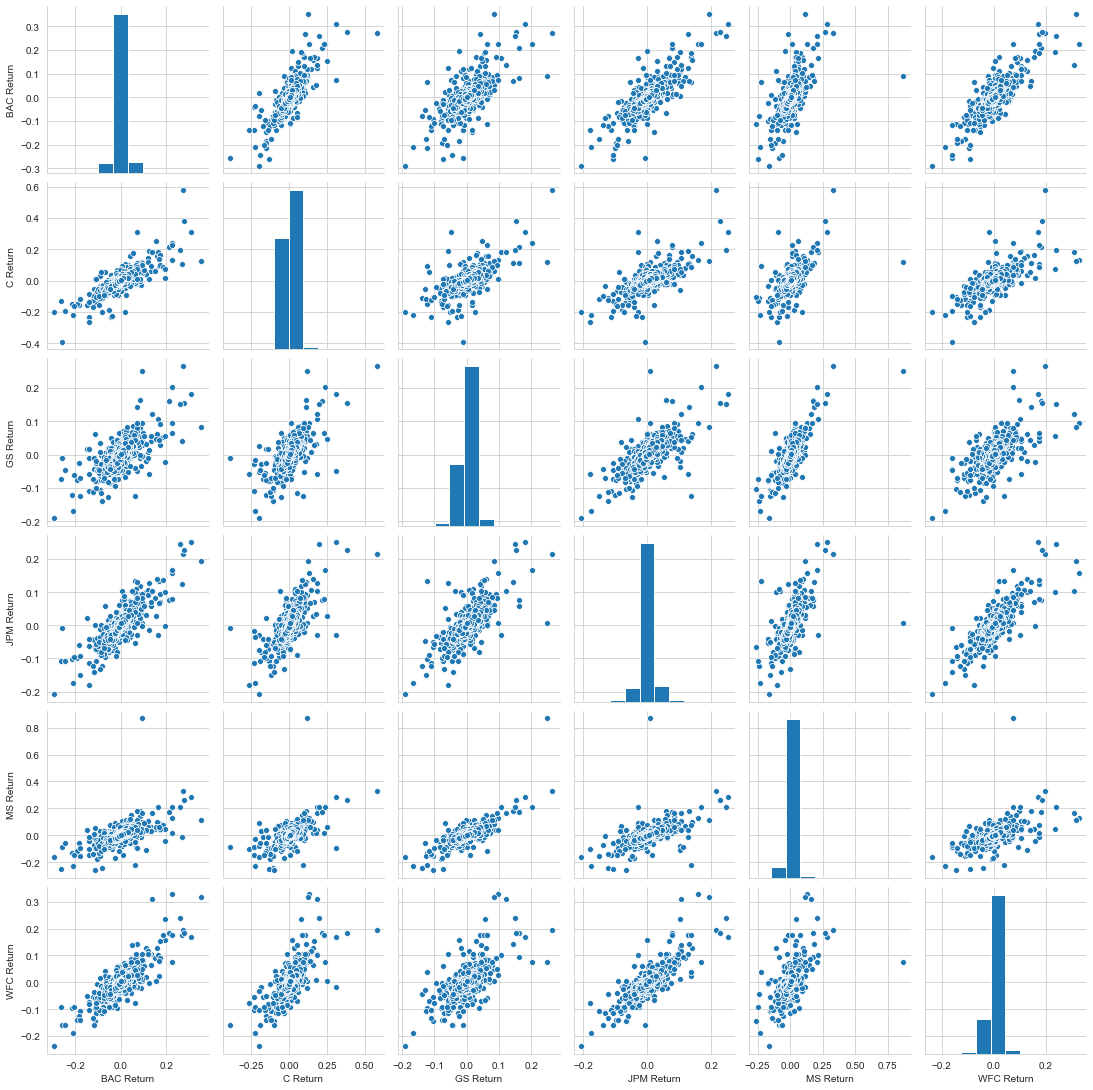

In [119]:
sns.pairplot(returns[1:])

Using this returns DataFrame, we will figure out on what dates each bank stock had the best and worst single day returns. Notice that 4 of the banks share the same day for the worst drop.

***Did anything significant happen on 2009-01-20?***
* It can be seen that of the 6 banks, 4 had their worst performance on the same day.
* President Obama took office on Jan. 20, 2009. [(More information here)](https://www.investopedia.com/ask/answers/101314/where-was-dow-jones-when-obama-took-office.asp)
* The [subprime mortgage crisis](https://en.wikipedia.org/wiki/Subprime_mortgage_crisis) also had a mayor part in the decline of prices.
* Markets had little confidence in the economy and the future was uncertain.
* The banking sector in general declining by 30%.
* Bank of America Corporation (BAC) dropped 29%, and Citigroup Inc. (C) sank 20%.
* The S&P 500 and the Nasdaq took similar hits on inauguration day, dropping 5.3% and 5.8%, respectively.

In [96]:
# Biggest single day losses
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

<a id="ch5"></a>
## Standard Deviation
Let's take a look at the standard deviation of the returns.

**[Standard Deviation](https://en.wikipedia.org/wiki/Standard_deviation):** Is a measure of the amount of variation or dispersion of a set of values. A low standard deviation indicates that the values tend to be close to the mean of the set, while a high standard deviation indicates that the values are spread out over a wider range.

Standard deviation is the statistical measure of market volatility, measuring how widely prices are dispersed from the average price. If prices trade in a narrow trading range, the standard deviation will return a low value that indicates low volatility. Conversely, if prices swing wildly up and down, then standard deviation returns a high value that indicates high volatility.

**Basically, standard deviation rises as prices become more volatile. As price action calms, standard deviation heads lower.**

***Which stock would you classify as the riskiest over the entire time period?***
* Looks like the two most riskiest stocks are Citigroup and Morgan Stanley.

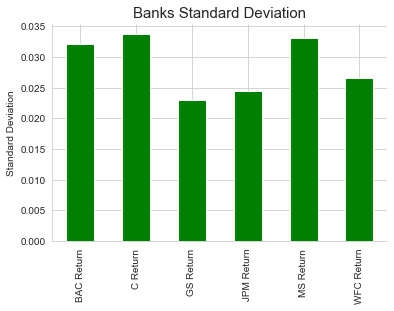

In [13]:
# Standard Deviation 
returns.std().plot(kind='bar', color='Green')
plt.ylabel('Standard Deviation')
plt.title('Banks Standard Deviation', fontsize=15)
sns.despine()

***Which would you classify as the riskiest for the year 2015?***
* They all have a similar risk profile with Wells Fargo being the lowest risk by not that much.

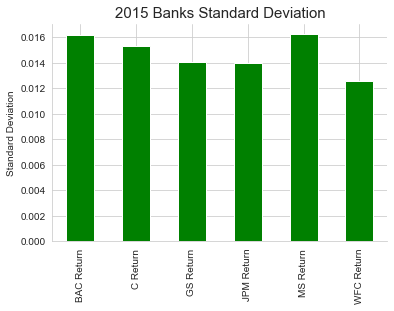

In [14]:
# 2015 Standard Deviation
returns.loc['2015-01-01':'2015-12-31'].std().plot(kind='bar', color='Green')
plt.ylabel('Standard Deviation')
plt.title('2015 Banks Standard Deviation', fontsize=15)
sns.despine()

**Create a distplot using seaborn of the 2015 returns for Morgan Stanley.**
* We can see that the distribution is pretty stable.

Text(0, 0.5, 'Numbers of Returns')

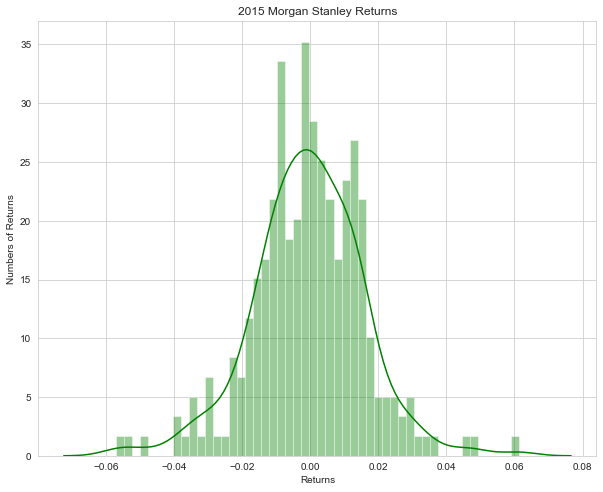

In [15]:
plt.figure(figsize=(10,8))
ax = sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'], color='green', bins=50)
ax.set_title('2015 Morgan Stanley Returns')
ax.set_xlabel('Returns')
ax.set_ylabel('Numbers of Returns')

**Create a distplot using seaborn of the 2008 returns for CitiGroup**
* Notice that the standard deviation is actually more stretched out. 
* If you look a normal year like 2015, a normal deviation is 0.06 and for CitiGroup in 2008 was 0.6. That is actually 10 times more deviation. 

Text(0, 0.5, 'Numbers of Returns')

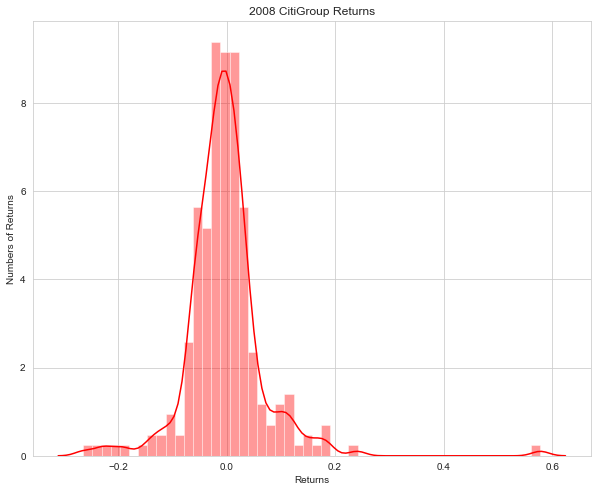

In [16]:
plt.figure(figsize=(10,8))
ax = sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'], color='red', bins=50)
ax.set_title('2008 CitiGroup Returns')
ax.set_xlabel('Returns')
ax.set_ylabel('Numbers of Returns')

<a id="ch6"></a>
## Pearson correlation matrix
We use the [Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient#:~:text=In%20statistics%2C%20the%20Pearson%20correlation,between%20%2B1%20and%20%E2%88%921.) to examine the strength and direction of the linear relationship between two continuous variables.

The correlation coefficient can range in value from −1 to +1. The larger the absolute value of the coefficient, the stronger the relationship between the variables. For the Pearson correlation, an absolute value of 1 indicates a perfect linear relationship. A correlation close to 0 indicates no linear relationship between the variables. 

The sign of the coefficient indicates the direction of the relationship. If both variables tend to increase or decrease together, the coefficient is positive, and the line that represents the correlation slopes upward. If one variable tends to increase as the other decreases, the coefficient is negative, and the line that represents the correlation slopes downward.

Let's create a heatmap of the correlation between the stocks Close Price.

<AxesSubplot:title={'center':'Pearson Correlation Matrix'}, xlabel='Bank Ticker', ylabel='Bank Ticker'>

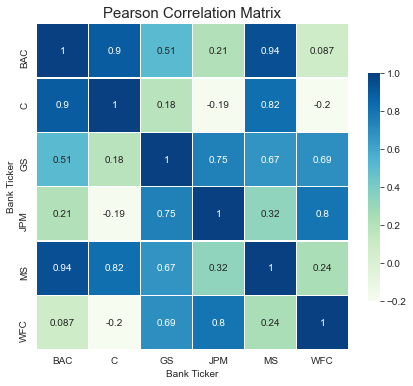

In [105]:
plt.figure(figsize=(7,6))
plt.title('Pearson Correlation Matrix',fontsize=15)
sns.heatmap(bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr(), annot=True, cmap='GnBu',
            linewidths=0.25, linecolor='w', cbar_kws={"shrink": .7})

Now we can use the same correlation of above to plot a [clustermap.](https://seaborn.pydata.org/generated/seaborn.clustermap.html) 

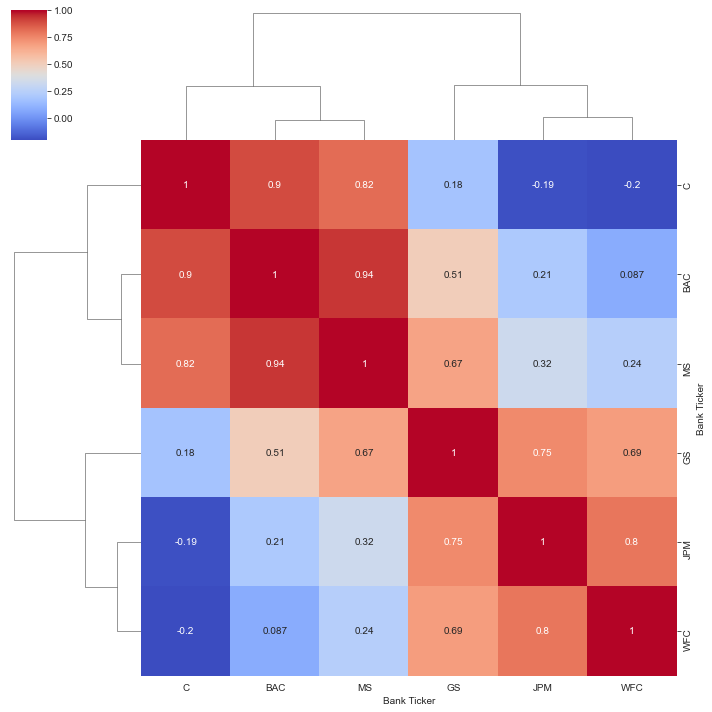

In [106]:
sns.clustermap(bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr(), annot=True, cmap='coolwarm')

<a id="ch7"></a>
## Financial Charts - Plotly
---
Plotly provides online graphing, analytics, and statistics tools for individuals and collaboration, as well as scientific graphing libraries for Python, R, MATLAB, Perl, Julia, Arduino, and REST.

You can find more information of Cufflinks [here.](https://github.com/santosjorge/cufflinks)

Let's create a line plot showing Close price for each bank for the entire index of time. We are going to show different ways of plotting the same information.
* Now we can clearly see the crash of Citigroup in 2008.
* Goldman Sachs also had a crash in 2008 but bounce back quite quickly after the recession.

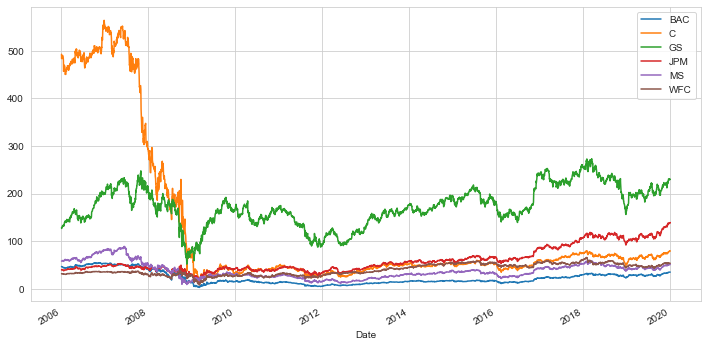

In [17]:
# Option N°1
for tick in tickers:
    bank_stocks[tick]['Close'].plot(label=tick, figsize=(12,6))
plt.legend()

<AxesSubplot:xlabel='Date'>

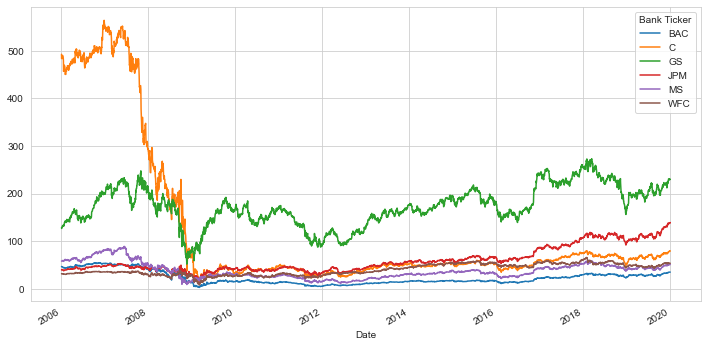

In [18]:
# Option N°2
bank_stocks.xs('Close', axis=1, level='Stock Info').plot(figsize=(12,6))

[Plotly](https://plotly.com/) provides online graphing, analytics, and statistics tools for individuals and collaboration, as well as scientific graphing libraries for Python, R, MATLAB, Perl, Julia, Arduino, and REST.

In [19]:
# Option N°3
bank_stocks.xs('Close', axis=1, level='Stock Info').iplot(xTitle='Date', yTitle='Close Price', title='Cufflinks - Close Price for Each Bank')

<a id="ch8"></a>
## Returns Histograms

Documentation:[Histograms in Python](https://plotly.com/python/histograms/)

We can also use plotly to show histograms. In this case we are showing the returns of each bank from 2018 to 2020.

In [107]:
fig = make_subplots(rows=3, cols=2)

trace0 = go.Histogram(x=returns.loc['2018-01-01':'2019-12-31']['BAC Return'], nbinsx=50, name="BAC")
trace1 = go.Histogram(x=returns.loc['2018-01-01':'2019-12-31']['C Return'], nbinsx=50, name="C")
trace2 = go.Histogram(x=returns.loc['2018-01-01':'2019-12-31']['GS Return'], nbinsx=50, name="GS")
trace3 = go.Histogram(x=returns.loc['2018-01-01':'2019-12-31']['JPM Return'], nbinsx=50, name="JPM")
trace4 = go.Histogram(x=returns.loc['2018-01-01':'2019-12-31']['MS Return'], nbinsx=50, name="MS")
trace5 = go.Histogram(x=returns.loc['2018-01-01':'2019-12-31']['WFC Return'], nbinsx=50, name="WFC")

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 2, 2)
fig.append_trace(trace4, 3, 1)
fig.append_trace(trace5, 3, 2)

fig.update_layout(title_text='Banks Returns (2018 - 2019)')

fig.show()

<a id="ch9"></a>
## Moving Averages
---
The [moving average (MA)](https://en.wikipedia.org/wiki/Moving_average) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks or any time period the trader chooses. The most common applications of moving averages are to identify trend direction and to determine support and resistance levels.

Let's analyze the moving averages for these stocks in the year 2008. 

***What is the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008?***

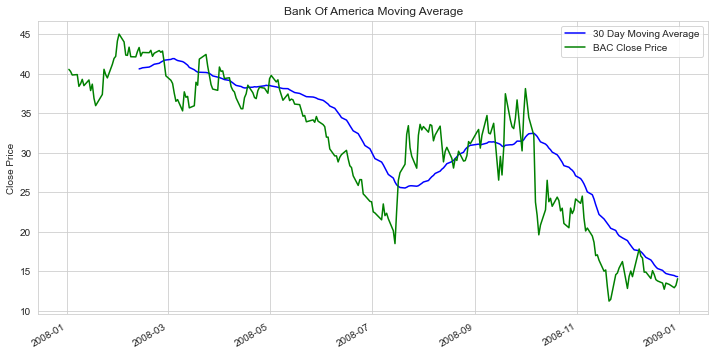

In [111]:
plt.figure(figsize=(12,6))
BAC['Close'].loc['2008-01-01':'2008-12-31'].rolling(window=30).mean().plot(color='blue', label='30 Day Moving Average')
BAC['Close'].loc['2008-01-01':'2008-12-31'].plot(color='green', label='BAC Close Price')
plt.ylabel('Close Price')
plt.xlabel('')
plt.title('Bank Of America Moving Average')
plt.legend()


In [109]:
BAC['Close'].loc['2008-01-01':'2008-12-31'].iplot(fill=True,colors=['green'])

<a id="ch10"></a>
## Simple Moving Averages
A [simple moving average (SMA)](https://www.investopedia.com/terms/s/sma.asp) calculates the average of a selected range of prices, usually closing prices, by the number of periods in that range. Is a technical indicator that can aid in determining if an asset price will continue or if it will reverse a bull or bear trend.

Use `.ta_plot(study='sma')` to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.

In [112]:
MS.loc['2015-01-01':'2016-01-01']['Close'].ta_plot(study='sma', periods=[13,21,55])

<a id="ch11"></a>
## Candlestick Charts
---
Documentation: [Candlestick Charts in Python](https://plotly.com/python/candlestick-charts/)

The candlestick chart is a style of financial chart describing open, high, low and close for a given x coordinate (most likely time). The boxes represent the spread between the open and close values and the lines represent the spread between the low and high values. Sample points where the close value is higher (lower) then the open value are called increasing (decreasing). By default, increasing candles are drawn in green whereas decreasing are drawn in red.

You can learn more about Candlestick Charts [here.](https://www.investopedia.com/trading/candlestick-charting-what-is-it/#:~:text=in%20candlestick%20charts.-,Candlestick%20Components,close%20of%20that%20day's%20trading.)

Let's plot Bank of America stock price in Candlestick format. 

In [23]:
# Bank of America Candlestick Chart
fig = go.Figure(data=[go.Candlestick(x=BAC.index,
                open=BAC['Open'],
                high=BAC['High'],
                low=BAC['Low'], 
                close=BAC['Close'])
                ])

fig.update_layout(
    title='Bank of Amercia Stock Price',
    yaxis_title='BAC Stock',
    shapes = [dict(
        x0='2009-01-20', x1='2009-01-20', y0=0, y1=1, xref='x', yref='paper', line_width=2),
             dict(
        x0='2007-12-01', x1='2007-12-01', y0=0, y1=1, xref='x', yref='paper', line_width=2)],
    annotations=[dict(
        x='2009-01-20', y=0.95, xref='x', yref='paper',
        showarrow=False, xanchor='left', text='President Obama Took Office'), 
                 dict(
        x='2007-12-01', y=0.1, xref='x', yref='paper',
        showarrow=False, xanchor='right', text='Subprime Mortgage Crisis')]
)

fig.show()

Use `.iplot(kind='candle)` to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.

In [24]:
# Bank of America Candlestick Chart
BAC[['Open', 'High', 'Close', 'Low']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle', 
                                                                           title='Bank of Amercia Stock Price', 
                                                                           yaxis_title='BAC Stock')

<a id="ch12"></a>
## Bollinger Band
A [Bollinger Band](https://www.fidelity.com/learning-center/trading-investing/technical-analysis/technical-indicator-guide/bollinger-bands#:~:text=Bollinger%20Bands%20are%20envelopes%20plotted,Period%20and%20Standard%20Deviations%2C%20StdDev.) is a technical analysis tool defined by a set of trendlines plotted two standard deviations (positively and negatively) away from a simple moving average (SMA) of a security's price, but which can be adjusted to user preferences.
* When the bands tighten during a period of low volatility, it raises the likelihood of a sharp price move in either direction.
* When the bands separate by an unusual large amount, volatility increases and any existing trend may be ending.
* Prices have a tendency to bounce within the bands' envelope, touching one band then moving to the other band. You can use these swings to help identify potential profit targets.

Use `.ta_plot(study='boll')` to create a Bollinger Band Plot for Bank of America for the year 2015.

In [26]:
BAC.loc['2015-01-01':'2016-01-01']['Close'].ta_plot(study='boll',periods=14, title='Bollinger Bands')

<a id="ch13"></a>
## Bank Facet plot
Documentation: [Time Series and Date Axes in Python](https://plotly.com/python/time-series/)

Facet plots, also known as trellis plots or small multiples, are figures made up of multiple subplots which have the same set of axes, where each subplot shows a subset of the data. 

In this faceted area plot we can see all the banks separately.

In [27]:
fig = px.area(bank_stocks.xs(key='Close', axis=1, level='Stock Info'), facet_col="Bank Ticker", facet_col_wrap=2)
fig.show()

<a id="ch14"></a>
## OHLC Charts
Documentation: [OHLC Charts in Python](https://plotly.com/python/ohlc-charts/)

The OHLC chart (for open, high, low and close) is a style of financial chart describing open, high, low and close values for a given x coordinate (most likely time). The tip of the lines represent the low and high values and the horizontal segments represent the open and close values. Sample points where the close value is higher (lower) then the open value are called increasing (decreasing). By default, increasing items are drawn in green whereas decreasing are drawn in red.

You can find more information [here.](https://www.investopedia.com/terms/o/ohlcchart.asp) 

<img src="http://www.saturn.network/blog/content/images/2019/01/ohcl.png" width="300" height="300"/>

In [28]:
# Citigroup OHLC Chart
fig = go.Figure(data=go.Ohlc(x=C.index,
                    open=C['Open'],
                    high=C['High'],
                    low=C['Low'],
                    close=C['Close']))

fig.update_layout(
    title='Citigroup Stock Price',
    yaxis_title='C Stock',
    shapes = [dict(
        x0='2009-01-20', x1='2009-01-20', y0=0, y1=1, xref='x', yref='paper', line_width=2),
             dict(
        x0='2007-12-01', x1='2007-12-01', y0=0, y1=1, xref='x', yref='paper', line_width=2)],
    annotations=[dict(
        x='2009-01-20', y=0.95, xref='x', yref='paper',
        showarrow=False, xanchor='left', text='President Obama Took Office'), 
                 dict(
        x='2007-12-01', y=0.1, xref='x', yref='paper',
        showarrow=False, xanchor='right', text='Subprime Mortgage Crisis')]
)

fig.show()

<a id="ch15"></a>
## References
* [An Introduction to Statistical Learning with Applications in R](http://faculty.marshall.usc.edu/gareth-james/ISL/) - This book provides an introduction to statistical learning methods.
* [Python for Data Science and Machine Learning Bootcamp](https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp/) - Use Python for Data Science and Machine Learning.
* [Financial Terms Dictionary](https://www.investopedia.com/financial-term-dictionary-4769738) - Comprehensive financial terms dictionary with over 13,000 finance and investment definitions.

## Feedback
* **Your feedback is much appreciated**
* **Please UPVOTE if you LIKE this notebook**
* **Comment if you have any doubts or you found any errors in the notebook**